In [61]:
#%matplotlib inline
#%pylab inline
%matplotlib notebook

from ipywidgets import *

#pylab.rcParams['figure.figsize'] = (10, 10)

import pandas as pd
import numpy as np
import requests
from urllib.request import urlopen
from pykml import parser
from lxml import etree
import os
import matplotlib
from matplotlib.patches import Circle, Wedge, Polygon
from matplotlib.collections import PatchCollection
import matplotlib.pyplot as plt

## Funcions auxiliars

A continuació definim unes funcions que ens facilitaran força la vida.

### get_dates(dataframe)

Aquesta funció retorna una llista amb les diferents dates que apareixen en la columna __DataOficial__ del __dataframe__.

In [65]:
def get_dates(dataframe):
    return data.DataOficial.unique()

### get_data_for_date(data, date)

Aquesta funció rep un dataframe __data__ i una data en forma d'string __date__, i retorna les entrades de __data__ amb data __date__

In [67]:
def get_data_for_date(dataframe, date):
    return data.loc[data['DataOficial'] == date]

## Obtenir les dades

Si no tenim les dades (no existeix l'arxiu __demografia.csv__), ens les baixarem del servidor de l'ajuntament.

In [62]:
if not os.path.exists('demografia.csv'):
    url = 'http://opendata.sabadell.cat/index.php?option=com_iasopendata&view=download&format=raw&urlOData=aHR0cDovL29kYXRhLnNhYmFkZWxsLmNhdC9vZGF0YTRQcm9kdWN0b3Ivb2RhdGE0UHJvZHVjdG9yLnN2Yy9QbWgzT2REYWRlc2RlbW9ncmFmaXF1ZXMvP2Zvcm1hdD1jc3YmaWRkaXN0PTE5ODUmJHNlbGVjdD1PcmRyZSxEYXRhT2ZpY2lhbCxEaXN0cmljdGUsU2VjdG9yLFRvdGFsSG9tZXMsVG90YWxEb25lcyxUb3RhbE5hY2lvbmFscyxUb3RhbENvbXVuaXRhcmlzLFRvdGFsRXN0cmFuZ2Vycw=='
    r = requests.get(url, allow_redirects=True)
    open('demografia.csv', 'wb').write(r.content)

## Llegir les dades

Utilitzarem [pandas]() per llegir l'arxiu csv (el separador de camps és ';', punt i coma). Un cop llegides, mostrem les 10 primeres files.

In [63]:
data = pd.read_csv('demografia.csv', delimiter=';')
print(data.head(10))

   Ordre DataOficial  Districte         Sector  TotalHomes  TotalDones  \
0     20  2014/01/01          1         CENTRE       15259       16948   
1     21  2014/01/01          1   SANT OLEGUER        9738       10674   
2     22  2014/01/01          2  CAN PUIGGENER        3295        3082   
3     23  2014/01/01          2      CREU ALTA        8453        9468   
4     24  2014/01/01          2        TOGORES          17          19   
5     25  2014/01/01          3     CA N´ORIAC        9383        9756   
6     26  2014/01/01          3           NORD        6782        7009   
7     27  2014/01/01          3     SANT JULIÀ         837         849   
8     28  2014/01/01          4        BERARDO        4418        4351   
9     29  2014/01/01          4       CAN RULL        8317        8606   

   TotalNacionals  TotalComunitaris  TotalEstrangers  
0           30391               410             1406  
1           18476               361             1575  
2            4570   

In [66]:
dates =  get_dates(data)
print(dates)
data_this_year = get_data_for_date(data, dates[0])
#print(data_this_year.groupby('Districte'))
#print(data_this_year[data_this_year.groupby('Districte')])
total_homes_districte_this_year = data_this_year.groupby('Districte')['TotalHomes'].sum()
print(total_homes_districte_this_year)
print(total_homes_districte_this_year.sum())
print(total_homes_districte_this_year/total_homes_districte_this_year.sum())
data['Districte'].value_counts()/data['Districte'].value_counts().sum()
print()

['2014/01/01' '2013/01/01' '2014/07/01' '2014/10/01' '2015/01/01'
 '2015/04/01' '2016/07/01' '2015/07/01' '2016/10/01' '2015/10/01'
 '2017/01/01' '2016/01/01' '2016/04/01' '2017/04/01']
Districte
1    25715
2    11859
3    17170
4    19090
5     9804
6    14573
7     4397
Name: TotalHomes, dtype: int64
102608
Districte
1    0.250614
2    0.115576
3    0.167336
4    0.186048
5    0.095548
6    0.142026
7    0.042852
Name: TotalHomes, dtype: float64



In [ ]:
data['Sector'].value_counts()

<IPython.core.display.Javascript object>


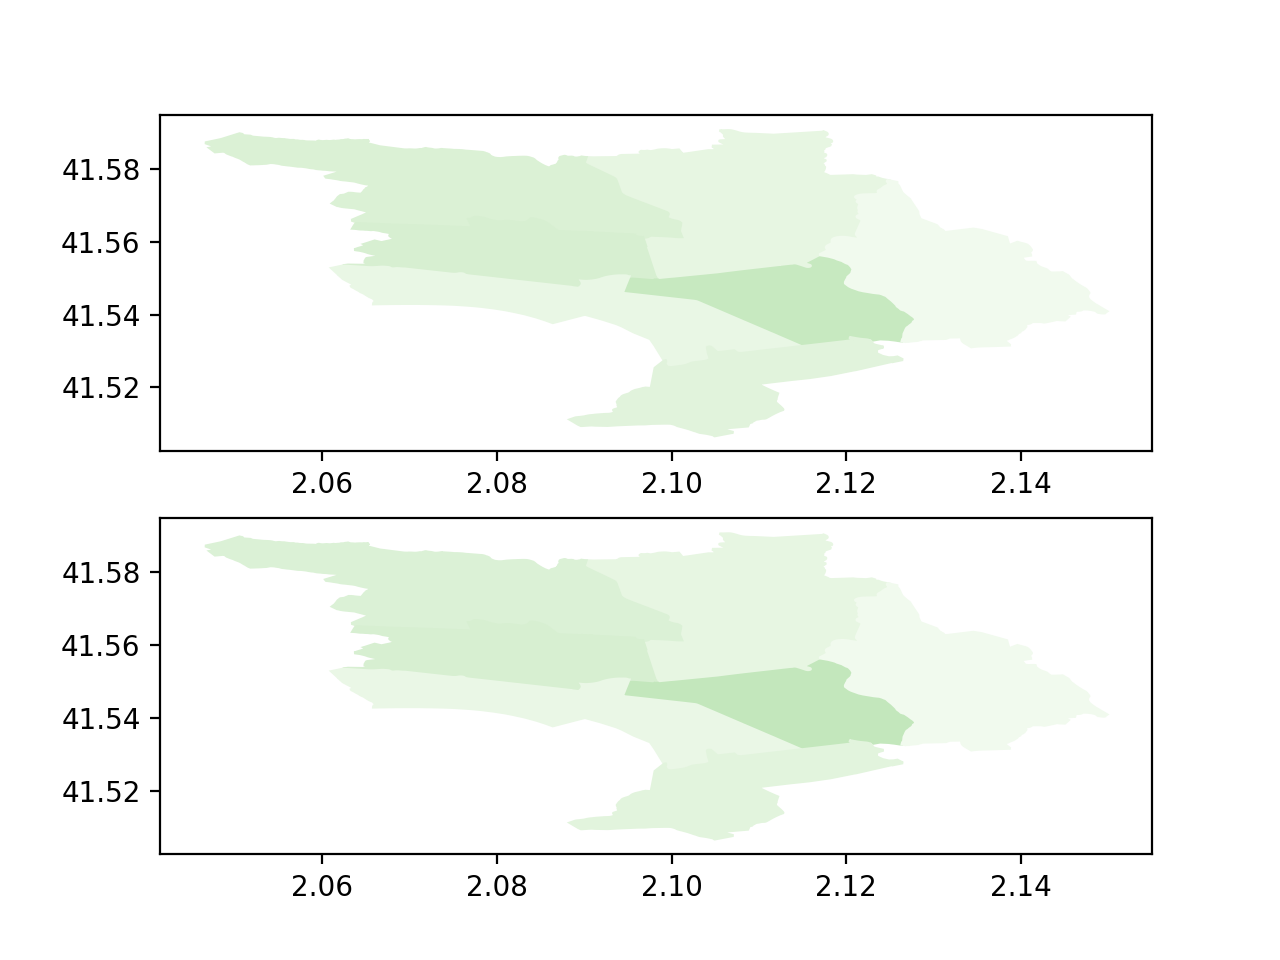

interactive(children=(IntSlider(value=6, description='w', max=18, min=-6), Output()), _dom_classes=('widget-in…

In [68]:
cmap = matplotlib.cm.get_cmap('Greens')

fileobject = urlopen('http://ca.sabadell.cat/fitxes/dadesobertes/kml/districtes.kml')
root = parser.parse(fileobject).getroot()
placemarks = [] 
for place in root.Document.Folder.Placemark:
    points_str = place.Polygon.outerBoundaryIs.LinearRing.coordinates
    
    points_list = str(points_str).split()
    points = np.zeros((len(points_list),2))

    for idx, pl in enumerate(points_list):
        plist = pl.split(',')
        points[idx,0] = float(plist[0])
        points[idx,1] = float(plist[1])
        
    placemarks.append(points)

data_this_year = data.loc[data['DataOficial'] == dates[0]]
total_homes_districte_this_year = data_this_year.groupby('Districte', as_index=False)['TotalHomes'].sum()
total_homes_this_year = total_homes_districte_this_year.sum()
total_homes_districte_this_year_norm = total_homes_districte_this_year/total_homes_districte_this_year.sum()

total_dones_districte_this_year = data_this_year.groupby('Districte', as_index=False)['TotalDones'].sum()
total_dones_this_year = total_dones_districte_this_year.sum()
total_dones_districte_this_year_norm = total_dones_districte_this_year/total_dones_districte_this_year.sum()


fig = plt.figure()
ax_homes = fig.add_subplot(2, 1, 1)
ax_dones = fig.add_subplot(2, 1, 2)


plots_homes = []
plots_dones = [] 
for idx, p in enumerate(placemarks):
    plots_homes.append(ax_homes.fill(p[:,0], p[:,1], color = cmap(total_homes_districte_this_year_norm.loc[idx,'TotalHomes']),
        linewidth=1, zorder=2))
    
    plots_dones.append(ax_dones.fill(p[:,0], p[:,1], color = cmap(total_dones_districte_this_year_norm.loc[idx,'TotalDones']),
        linewidth=1, zorder=2))


#line, = ax.plot(x, np.sin(x))

def update(w = 0):
    data_this_year = get_data_for_date(data, dates[w]) #data.loc[data['DataOficial'] == dates[w]]
    total_homes_districte_this_year = data_this_year.groupby('Districte', as_index=False)['TotalHomes'].sum()
    total_homes_this_year = total_homes_districte_this_year.sum()
    total_homes_districte_this_year_norm = total_homes_districte_this_year/total_homes_districte_this_year.sum()

    total_dones_districte_this_year = data_this_year.groupby('Districte', as_index=False)['TotalDones'].sum()
    total_dones_this_year = total_dones_districte_this_year.sum()
    total_dones_districte_this_year_norm = total_dones_districte_this_year/total_dones_districte_this_year.sum()
    
    for idx, p in enumerate(placemarks):
        print(str(idx)+' '+repr(total_homes_districte_this_year_norm.loc[idx,'TotalHomes']))
        plt.setp(plots_homes[idx], color= cmap(total_homes_districte_this_year_norm.loc[idx,'TotalHomes']))
        plt.setp(plots_dones[idx], color= cmap(total_dones_districte_this_year_norm.loc[idx,'TotalDones']))
    fig.canvas.draw()
    
interact(update,w=6);